# Assignment 03

Due Sep 20, 11:59pm. Please submit one .ipynb file to Beachboard. 

<p style='text-align: right; '> Kristine Martinez </p>
<p style='text-align: right; '> 9/13/2022 </p>

Please refer to the Lec03_NMF_SVD.ipynb, as well as the tutorial in this website: [https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py). 

Then do the following:

* Load the Faces dataset of human faces, form the data matrix called faces.  
* Find out how many human images are there. 
* Plot the first 4 human images in one row.
* Notice that we have implemented our own randomized SVD in class. 
* Please use our own implementation of randomized SVD to decompose the faces matrix, with 8 truncated components. 
* Plot the 8 eigenfaces in 2 rows and 4 columns. 
* Reconstruct the first 4 images using the 8 eigenfaces, and plot the reconstructed imagesc in one row. 

In [9]:
import logging

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn import decomposition

rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


Now plot the first 4 human images in one row:

In [19]:
n_row, n_col = 2, 4
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

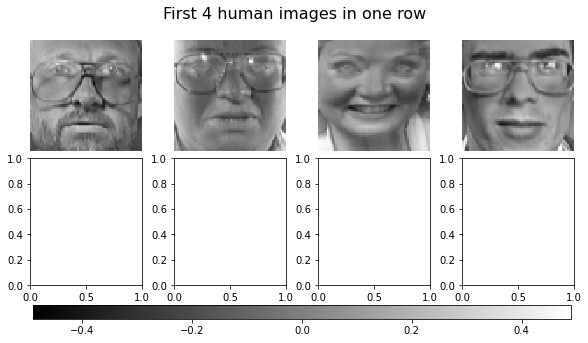

In [21]:
plot_gallery('First 4 human images in one row', faces_centered[:4])

In [5]:
U, s, V = decomposition.randomized_svd(faces, 8)
U.shape, s.shape, V.shape

((400, 8), (8,), (8, 4096))

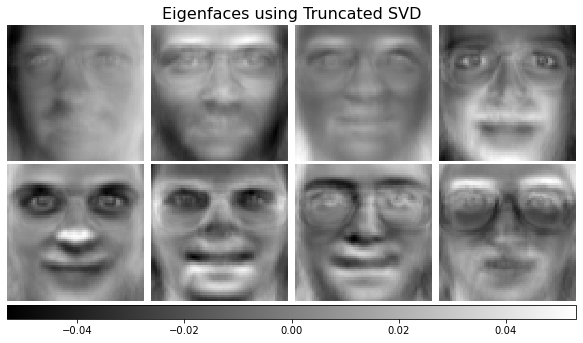

In [27]:
svd = decomposition.TruncatedSVD(n_components=n_components, n_iter=5)
svd.fit(faces_centered)
plot_gallery("Eigenfaces using Truncated SVD", svd.components_[:n_components])